In [1]:
# General imports of libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
import missingno as msno
import feather

In [2]:
# Reading the data
dirpath = os.getcwd()
myfile='Stock_price_data_with_industry.csv.gz'
DF = pd.read_csv(myfile)

In [3]:
# The overview of the data
print("**********\n\n",DF.shape,"\n\n**********\n")   # dimensions
print(DF.head(),"\n\n**********\n") # first 5 rows
print(DF.info(),"\n\n**********") # types

**********

 (56121924, 8) 

**********

   PERMNO      date TICKER              COMNAM  NAICS  DIVAMT     PRC  OPENPRC
0   10001  19890103   GFGC  GREAT FALLS GAS CO    NaN     NaN -6.3125      NaN
1   10001  19890104   GFGC  GREAT FALLS GAS CO    NaN     NaN  6.2500      NaN
2   10001  19890105   GFGC  GREAT FALLS GAS CO    NaN     NaN  6.5000      NaN
3   10001  19890106   GFGC  GREAT FALLS GAS CO    NaN     NaN  6.1250      NaN
4   10001  19890109   GFGC  GREAT FALLS GAS CO    NaN     NaN  6.5000      NaN 

**********

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56121924 entries, 0 to 56121923
Data columns (total 8 columns):
PERMNO     int64
date       int64
TICKER     object
COMNAM     object
NAICS      float64
DIVAMT     float64
PRC        float64
OPENPRC    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 3.3+ GB
None 

**********


In [4]:
# Changing the date format
DF['date'] = pd.to_datetime(DF['date'].astype(str), format='%Y%m%d')
DF.head()

,PERMNO,date,TICKER,COMNAM,NAICS,DIVAMT,PRC,OPENPRC
0,10001,1989-01-03,GFGC,GREAT FALLS GAS CO,NaN,NaN,-6.3125,NaN
1,10001,1989-01-04,GFGC,GREAT FALLS GAS CO,NaN,NaN,6.2500,NaN
2,10001,1989-01-05,GFGC,GREAT FALLS GAS CO,NaN,NaN,6.5000,NaN
3,10001,1989-01-06,GFGC,GREAT FALLS GAS CO,NaN,NaN,6.1250,NaN
4,10001,1989-01-09,GFGC,GREAT FALLS GAS CO,NaN,NaN,6.5000,NaN


In [5]:
# Observing for a single stock.
DF[DF['TICKER'] == "UNP"]

,PERMNO,date,TICKER,COMNAM,NAICS,DIVAMT,PRC,OPENPRC
15006145,48725,1989-01-03,UNP,UNION PACIFIC CORP,NaN,NaN,63.87500,NaN
15006146,48725,1989-01-04,UNP,UNION PACIFIC CORP,NaN,NaN,64.75000,NaN
15006147,48725,1989-01-05,UNP,UNION PACIFIC CORP,NaN,NaN,65.25000,NaN
15006148,48725,1989-01-06,UNP,UNION PACIFIC CORP,NaN,NaN,67.75000,NaN
15006149,48725,1989-01-09,UNP,UNION PACIFIC CORP,NaN,NaN,67.87500,NaN
...,...,...,...,...,...,...,...,...
15013699,48725,2018-12-24,UNP,UNION PACIFIC CORP,482111.0,NaN,128.21001,132.53000
15013700,48725,2018-12-26,UNP,UNION PACIFIC CORP,482111.0,NaN,136.02000,129.28999
15013701,48725,2018-12-27,UNP,UNION PACIFIC CORP,482111.0,NaN,137.14000,133.95000
15013702,48725,2018-12-28,UNP,UNION PACIFIC CORP,482111.0,NaN,136.78000,137.92999


In [6]:
DF[DF['TICKER'] == "GFGC"].head() #SONRA SILLLLLLL

,PERMNO,date,TICKER,COMNAM,NAICS,DIVAMT,PRC,OPENPRC
0,10001,1989-01-03,GFGC,GREAT FALLS GAS CO,NaN,NaN,-6.3125,NaN
1,10001,1989-01-04,GFGC,GREAT FALLS GAS CO,NaN,NaN,6.2500,NaN
2,10001,1989-01-05,GFGC,GREAT FALLS GAS CO,NaN,NaN,6.5000,NaN
3,10001,1989-01-06,GFGC,GREAT FALLS GAS CO,NaN,NaN,6.1250,NaN
4,10001,1989-01-09,GFGC,GREAT FALLS GAS CO,NaN,NaN,6.5000,NaN


In [7]:
# Creating more useful pivot table in order to work with different companies in different columns
DF_per_comp = DF.pivot_table(values='PRC',index='date',columns='TICKER')
DF_per_comp.head()

TICKER,A,AA,AAA,AAAB,AAABB,AAAP,AAAU,AAB,AABA,AABC,...,ZVUE,ZVX,ZVXI,ZX,ZY,ZYME,ZYNE,ZYNX,ZYTC,ZZ
date,,,,,,,,,,,,,,,,,,,,,
1989-01-03,0.7500,55.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,24.875,NaN,NaN,NaN,NaN,NaN
1989-01-04,0.7500,56.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25.125,NaN,NaN,NaN,NaN,NaN
1989-01-05,0.7500,57.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25.125,NaN,NaN,NaN,NaN,NaN
1989-01-06,0.9375,57.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25.125,NaN,NaN,NaN,NaN,NaN
1989-01-09,1.0000,58.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25.000,NaN,NaN,NaN,NaN,NaN


In [8]:
# Check if there is duplicates in date
DF_per_comp.index[DF_per_comp.index.duplicated()].unique()

DatetimeIndex([], dtype='datetime64[ns]', name='date', freq=None)

Text(0,0.5,'log UNP')

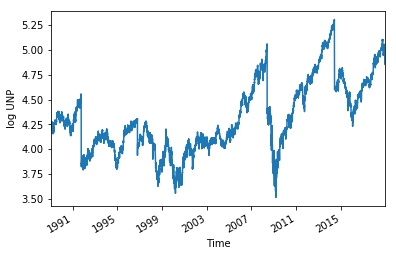

In [9]:
# Visualizing prices for a single stock
np.log(DF_per_comp["UNP"]).plot()  
plt.xlabel("Time")
plt.ylabel("log UNP")

Text(0,0.5,'log-returns UNP')

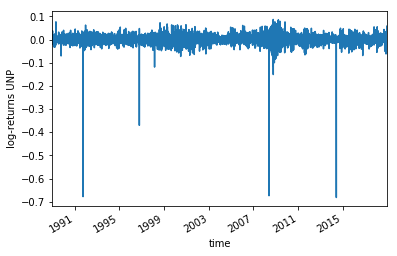

In [10]:
# Visualizing log -returns
np.log(DF_per_comp["UNP"]).diff().plot()
plt.xlabel("time")
plt.ylabel("log-returns UNP")

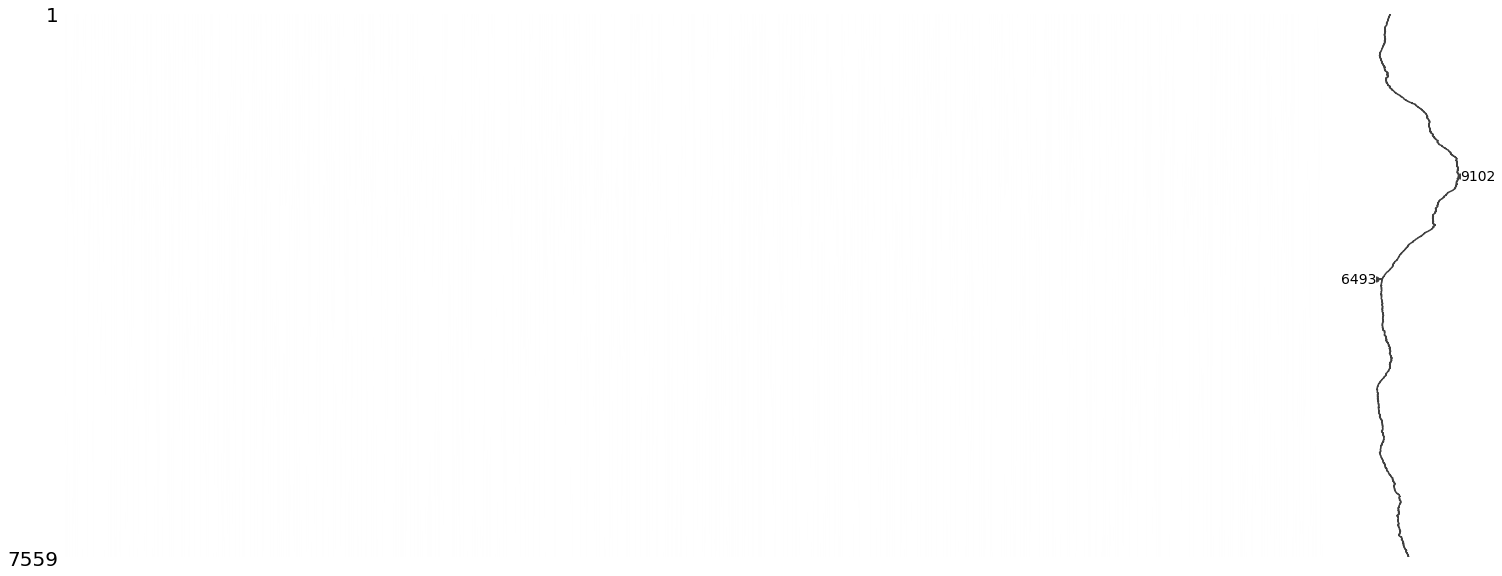

In [11]:
# Missing Data check 
msno.matrix(DF_per_comp)

25572

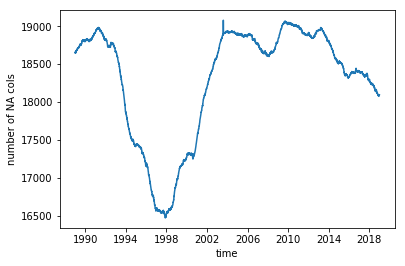

In [12]:
# Visualizing missing data per day (per line or per row)
missingDataPerLine = DF_per_comp.isnull().sum(axis=1) 

plt.plot(missingDataPerLine)
plt.xlabel("time")
plt.ylabel("number of NA cols")
DF_per_comp.columns.size

In [13]:
# when UNP is NA
special_lines = DF_per_comp["UNP"].isnull()
# check if any true value in special lines
not any(special_lines)
# suprisingly there is no true value (missing value) in the series.

True

In [14]:
#special_lines = DF_per_comp[DF_per_comp.columns].isnull().sum(a)
special_lines = DF_per_comp["MSFT"].isnull()
not any(special_lines)

True

In [15]:
# Let's try with some other company as GREAT FALLS GAS CO
special_lines = DF_per_comp['GFGC'].isnull()
not any(special_lines)

False

In [16]:
#what is not NA when GFGC is NA
DF_per_comp[special_lines].notnull()

TICKER,A,AA,AAA,AAAB,AAABB,AAAP,AAAU,AAB,AABA,AABC,...,ZVUE,ZVX,ZVXI,ZX,ZY,ZYME,ZYNE,ZYNX,ZYTC,ZZ
date,,,,,,,,,,,,,,,,,,,,,
1993-11-22,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1993-11-23,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1993-11-24,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1993-11-26,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1993-11-29,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,True,True,False,False,False,False,True,False,True,False,...,False,False,False,False,False,True,True,False,False,False
2018-12-26,True,True,False,False,False,False,True,False,True,False,...,False,False,False,False,False,True,True,False,False,False
2018-12-27,True,True,False,False,False,False,True,False,True,False,...,False,False,False,False,False,True,True,False,False,False


In [17]:
# sum by columns
is_asset_special=DF_per_comp[special_lines].notnull().sum(axis=0)>0

In [18]:
is_asset_special

TICKER
A         True
AA        True
AAA       True
AAAB      True
AAABB     True
         ...  
ZYME      True
ZYNE      True
ZYNX     False
ZYTC     False
ZZ        True
Length: 25572, dtype: bool

In [19]:
#special assets are then easily obtained
special_assets = DF_per_comp.columns[is_asset_special]
print(special_assets)

Index(['A', 'AA', 'AAA', 'AAAB', 'AAABB', 'AAAP', 'AAAU', 'AAB', 'AABA',
       'AABC',
       ...
       'ZU', 'ZUMZ', 'ZUO', 'ZVUE', 'ZVX', 'ZVXI', 'ZX', 'ZYME', 'ZYNE', 'ZZ'],
      dtype='object', name='TICKER', length=23055)


In [20]:
# The size of all special assets is too large. However let's observe how it looks like when we remove them

# Remove all columns of the special assets
Removed_DF = DF_per_comp.drop(columns = special_assets)

In [21]:
# Remove special lines
Removed_DF = Removed_DF[Removed_DF['GFGC'].notnull()]

2517

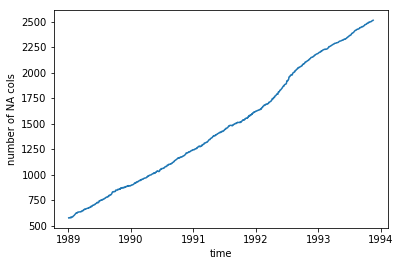

In [22]:
cleaned_missingDataPerLine = Removed_DF.isnull().sum(axis=1) 

plt.plot(cleaned_missingDataPerLine)
plt.xlabel("time")
plt.ylabel("number of NA cols")
Removed_DF.columns.size

In [23]:
#log returns of all the columns at once
#r = np.log(DF_per_comp).diff()

In [24]:
#r = r.iloc[1:]
#r.head()

In [25]:
#missingDataPerLine = r.isnull().sum(axis=1) 

#plt.plot(missingDataPerLine)
#plt.xlabel("time")
#plt.ylabel("number of NA cols")
#r.columns.size

In [26]:
#non_existing_assets = r.columns[r[-2017:-1].isnull().sum(axis=0)==2016]
#r.drop(columns=non_existing_assets,inplace=True)

In [27]:
#r.columns[r[-2017:-1].isnull().sum(axis=0)==2016]

In [28]:
#missingDataPerLine = r.isnull().sum(axis=1) 

#plt.plot(missingDataPerLine)
#plt.xlabel("time")
#plt.ylabel("number of NA cols")
#r.columns.size

In [29]:
#theta = 0.15  # arbirary.

#the Pandas' way
#r.clip(-theta,theta,inplace=True)

#the logical way
#sel_outliers = np.abs(r)>theta
#r[sel_outliers] = np.sign(r[sel_outliers])*theta

In [30]:
#r.columns[r[sel_outliers].notnull().sum(axis=0)>0]

In [31]:
#r.reset_index(level=0, inplace=True)

In [32]:
#r.head()

In [34]:
DF_per_comp.reset_index(level=0, inplace=True)

In [35]:
DF_per_comp.head()

TICKER,date,A,AA,AAA,AAAB,AAABB,AAAP,AAAU,AAB,AABA,...,ZVUE,ZVX,ZVXI,ZX,ZY,ZYME,ZYNE,ZYNX,ZYTC,ZZ
0,1989-01-03,0.7500,55.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,24.875,NaN,NaN,NaN,NaN,NaN
1,1989-01-04,0.7500,56.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25.125,NaN,NaN,NaN,NaN,NaN
2,1989-01-05,0.7500,57.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25.125,NaN,NaN,NaN,NaN,NaN
3,1989-01-06,0.9375,57.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25.125,NaN,NaN,NaN,NaN,NaN
4,1989-01-09,1.0000,58.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25.000,NaN,NaN,NaN,NaN,NaN


In [36]:
feather.write_dataframe(DF_per_comp,"Equities_prices.feather")